# This Notebook have been made by Warda IDRIS on 17/04/2022 by following the 4 parts of this tuto : https://www.youtube.com/watch?v=O56RCPIBb24&t=0s

# 1. Finding the goal : finding the relationship between oil price and exxon price

# 2. Selection of Data by Importing the data and libraries needed

In [10]:
#2 Selection of Data by Importing the data and libraries needed

#Importing Libraries
import pandas as pd #This will make grabbing and transforming the data quick.
import numpy as np # for mathematical calculations
import matplotlib.pyplot as plt #for data visualisation
import statsmodels.api as sm #to evaluate the model
import math
import seaborn as sns #allows to plot 

from sklearn.model_selection import train_test_split #to train and predict
from sklearn.linear_model import LinearRegression #choosing Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #to evaluate the model

from scipy import stats 
from scipy.stats import kurtosis, skew #to explore the data

%matplotlib inline

#Loading data
path =r"C:\Users\DZ001095\Documents\4- 2022\0- Data Science\1- Linear Regression\Model01\oil_exxon.xlsx" #put the path; the r allows us to put one \
price_data = pd.read_excel(path) #load the data 

# set the index equal to the date column & then drop the old date column
price_data.index = pd.to_datetime(price_data['date']) #make sure that it's on format date
price_data = price_data.drop(['date'], axis = 1)
price_data.head(10) #print the first 10 rows of data

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88
2014-04-04,97.360001,106.41
2014-04-07,96.779999,104.89
2014-04-08,97.449997,105.83
2014-04-09,97.330002,107.39


# 3. Preprocessing and Clean Data : Dealing with missing values and errors

In [2]:
#3 Preprocessing and Clean Data : Dealing with missing values and errors

#Check Data Types 
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [11]:
#3 Preprocessing and Clean Data : Dealing with missing values and errors

#rename columns
# define the new name.
new_column_names = {'exon_price':'exxon_price'}

# rename the column
price_data = price_data.rename(columns = new_column_names)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [12]:
#3 Preprocessing and Clean Data : Dealing with missing values and errors

# check for missing values
display(price_data.isna().any()) #if one column returns True, this means that it has missing values

# drop any missing values
price_data = price_data.dropna() #drop those missing values_we can use fillna to fill them instead of droping

# let's check to make sure they've all been removed.
price_data.isna().any()

exxon_price    False
oil_price       True
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

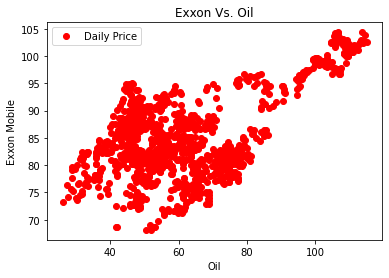

In [13]:
#4 Explore Data : Plot data, measure correlation, get statistical summary, check skew; outliers and kurtosis

#Plot data to better visualise it
# define the x & y data.
x = price_data['oil_price']  #X axis is oil price
y = price_data['exxon_price'] #Y axis is exxon price

# create the scatter plot.
plt.plot(x, y, 'o', color ='red', label = 'Daily Price')

# make sure it's formatted.
plt.title("Exxon Vs. Oil")
plt.xlabel("Oil") #the label of x axis
plt.ylabel("Exxon Mobile") #the Label of y axis
plt.legend() #put legend

plt.show() #show the plot

# 4. Explore Data : Plot data, measure correlation, get statistical summary, check skew; outliers and kurtosis


,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<AxesSubplot:title={'center':'exxon_price'}>,
        <AxesSubplot:title={'center':'oil_price'}>]], dtype=object)

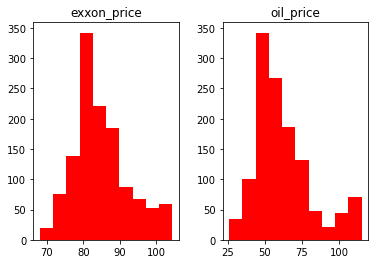

In [6]:
#4 Explore Data : Plot data, measure correlation, get statistical summary, check skew; outliers and kurtosis

#Measure the correlation 
#Very strong relationship (|r|>0.8 =>)
#Strong relationship (0.6≤|r|)
#Moderate relationship (0.4≤|r|)
#Weak relationship (0.2≤|r|)
#Very weak relationship (|r|)

display(price_data.corr()) #strong relationship


# Get statistical summary.
display(price_data.describe()) #display function is used to display many outputs at once

#Overview of data to check if there is skew and kurtosis
price_data.hist(grid = False, color = 'red')

### a. Kurtosis :

* fisher method compares to zero.
* Pearson method compares to 3
* Results : 
    - kurtosis ≈3 (excess ≈0) is called mesokurtic. This is a normal distribution
    - kurtosis <3 (excess kurtosis <0) is called platykurtic. 
    - kurtosis >3 (excess kurtosis >0) is called leptokurti

### b. Skeweness : 

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.

'Exxon Excess Kurtosis: 0.088'

'Oil Excess Kurtosis: 0.53'

'Exxon Skew: 0.66'

'Oil Skew: 1.0'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

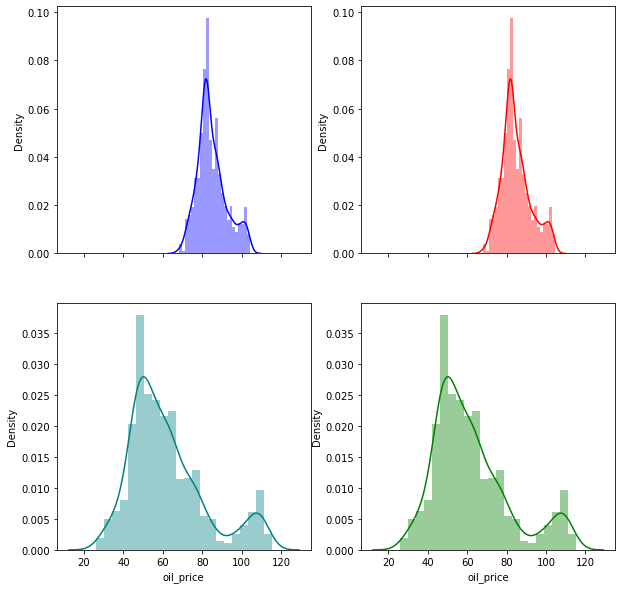

In [7]:
#4 Explore Data : Plot data, measure correlation, get statistical summary, check skew; outliers and kurtosis

# calculate the excess kurtosis using the fisher method. The alternative is Pearson which calculates regular kurtosis.
#fisher method compares to zero. Pearson method compares to 3
#kurtosis ≈3 (excess ≈0) is called mesokurtic. This is a normal distribution
#kurtosis <3 (excess kurtosis <0) is called platykurtic.
#kurtosis >3 (excess kurtosis >0) is called leptokurti

exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher = True)


# calculate the skewness
#If skewness is less than −1 or greater than +1, the distribution is highly skewed.
#If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
#If skewness is between −½ and +½, the distribution is approximately symmetric.

exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])

display("Exxon Excess Kurtosis: {:.2}".format(exxon_kurtosis))  # this looks fine
display("Oil Excess Kurtosis: {:.2}".format(oil_kurtosis))      # this looks fine

display("Exxon Skew: {:.2}".format(exxon_skew))          # moderately skewed
display("Oil Skew: {:.2}".format(oil_skew))              # moderately skewed, it's a little high but we will accept it.

#plot the data for each column
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot( price_data['exxon_price'] , color="blue", ax=axes[0, 0])
sns.distplot( price_data['oil_price'] , color="teal", ax=axes[1, 0])
sns.distplot( price_data['exxon_price'] , color="red", ax=axes[0, 1])
sns.distplot( price_data['oil_price'] , color="green", ax=axes[1, 1])
plt.show()

# 5. Build the Model : Train, test, split


In [8]:
#5 Build the Model : Train, test, split
# define our input variable (X) & output variable.

Y = price_data.drop('oil_price', axis = 1) #output will be exxon price the one we want to predict
X = price_data[['oil_price']] #input will be oil price the one in relationship with exxon price

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) #using train_test_split of sklearn.model.selection

# create a Linear Regression model object.
regression_model = LinearRegression() #get the model from sklearn.linear_model

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train) #fit the model with our splited data X and Y


LinearRegression()

Y= B0+B1X 
finding B0(intercept) and B1(coefficient)

In [9]:
# let's grab the coefficient of our model and the intercept.
intercept = regression_model.intercept_[0] #B0
coefficient = regression_model.coef_[0][0] #B1

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

#Interpreting the coefficient, we would say that a single unit increase in oil is associated with a 0.24 increase in the price of Exxon Mobile stock. We are NOT CLAIMING CAUSATION, just association.

The Coefficient for our model is 0.24
The intercept for our model is 70.01


In [14]:
# let's test a prediction

prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 85.95


In [15]:
# Get multiple predictions.
y_predict = regression_model.predict(X_test) #predicting by using the test data

# Show the first 5 predictions
y_predict[:5]

array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ],
       [84.01324704]])

# 6. Evaluating the Model

In [16]:
# define our intput
X2 = sm.add_constant(X) #a second variable to evaluate the model. using statsmodel.api 

# create a OLS model.
model = sm.OLS(Y, X2) # ordinary least squares 

# fit the data
est = model.fit() #fit the model

### * Confidence Intervals :

 By default that the calculated using 95% intervals.
* Want a narrower range? Decrease your confidence.
* Want a wider range? Increase your confidence.

In [17]:
# make some confidence intervals, 95% by default.
est.conf_int() 
#Interpreting the output above, we would say that with 95% confidence:
#the oil_price coefficient(B0) exists between 0.214 & 0.248.
#the constant (B0) exists between 69.35 & 71.57

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


In [18]:
# use 99 % CI
est.conf_int(alpha=0.01) 
#Interpreting the output above  we would say that with 99% confidence :
#the oil_price coefficient(B1) exists between 0.208 & 0.253.
#the constant (B0) exists between 69.008 & 71.95

,0,1
const,69.008888,71.925028
oil_price,0.208988,0.253944


### * Hypothesis Testing :

* Null Hypothesis: There is no relationship between the price of oil and the price of Exxon. ==> The coefficient equals 0.
* Alternative Hypothesis: There is a relationship between the price of oil and the price of Exxon. ==> The coefficient does not equal to 0.

- If we reject the null, we are saying there is a relationship, and the coefficient does not equal 0.

- If we fail to reject the null, we are saying there is no relationship, and the coefficient does equal 0.

The p-value represents the probability that the coefficient equals 0. We want a p-value that is less than 0.05 if it is we can reject the null hypothesis.

In [19]:
# estimate the p-values.
est.pvalues #the pvalue = 1.423529e-123 and represents the probability that the relationship is equal to 0 ==> We reject the Null Hypothesis

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

# 7. Model Fit : compare the actual result with the predicted one (residual) and calculate the errors 

* Mean Absolute Error (MAE): Is the mean of the absolute value of the errors. This metric gives an idea of magnitude but no idea of direction (too high or too low).

* Mean Squared Error (MSE): Is the mean of the squared errors.MSE is more popular than MAE because MSE "punishes" more significant errors.

* Root Mean Squared Error (RMSE): Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

In [20]:
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 38.4
MAE 5.03
RMSE 6.2


### * R Squared : 

* The R-Squared metric provides us a way to measure the goodness of fit or how well our data fits the model. The higher the R-Squared metric, the better the data fit our model.
However, we have to know the limitations of R-Square. 
One limitation is that R-Square increases as the number of feature increases in our model, so it does not pay to select the model with the highest R-Square.
* A more popular metric is the adjusted R-Square which penalizes more complex models. 

In [22]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.31


In [24]:
# print out a summary using 95% CI
print(est.summary()) #using statsmodel.api

# print out a summary using 99% CI
print(est.summary(alpha=0.01)) #using statsmodel.api

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          1.42e-123
Time:                        15:19:37   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

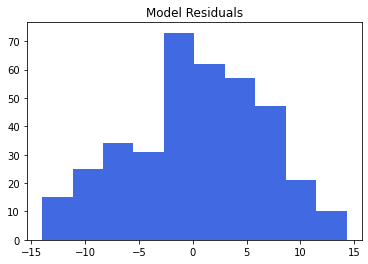

In [25]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

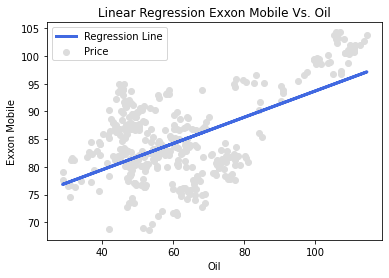

Oil coefficient:0.24
Mean squared error: 38.44
Root Mean squared error: 6.2
R2 score: 0.31


In [26]:
# Plot outputs
plt.scatter(X_test, y_test,  color='gainsboro', label = 'Price')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()

# The coefficients
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

In [28]:
#save the model to future use
import pickle

# pickle the model.
with open('my_linear_regression.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in.
with open('my_linear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

# make a new prediction.
regression_model_2.predict([[67.33]]) #make a prediction using the saved model

array([[85.94980965]])